In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('diwali_sales_data.csv') 
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra?radesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Data Cleaning

In [4]:
#Shape of Data
df.shape

(11251, 15)

In [5]:
# Check Summary of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
# Remove Unwanted Column
df.drop(['Status','unnamed1'],axis=1, inplace=True)

In [8]:
#Check if Column is removed or not?
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra?radesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [9]:
#Check Null Value for each Column
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
#Drop Null Values
df.dropna(inplace= True)

In [11]:
# Check Null Value for each Columnn Again
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
#Change Datatype of Amount  [ float - int ]
df['Amount']= df['Amount'].astype('int')             # df['Salary'].astype('int')

In [14]:
#Check Datatype of column 
df['Amount'].dtype                                   # type(x)      df['Salary'].dtype

dtype('int32')

In [15]:
#list all the columns
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [16]:
#Rename Column
df.rename(columns={"Age Group":"Age_Group"}, inplace=True)

In [17]:
type(df)

pandas.core.frame.DataFrame

In [18]:
#Basic Stats
#df.describe()
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

## GENDER_ANALYSIS

In [230]:
'''
MILLION CONVERTER FUNCTION

import matplotlib.ticker as ticker
def millions_converter(x, pos):
    return f'{x / 1000000:.0f}M'
  
#EMBEDD IN EACH CHARTS

converter = ticker.FuncFormatter(millions_converter)
plt.gca().yaxis.set_major_formatter(converter)
'''

"\nMILLION CONVERTER FUNCTION\n\nimport matplotlib.ticker as ticker\ndef millions_converter(x, pos):\n    return f'{x / 1000000:.0f}M'\n  \n#EMBEDD IN EACH CHARTS\n\nconverter = ticker.FuncFormatter(millions_converter)\nplt.gca().yaxis.set_major_formatter(converter)\n"

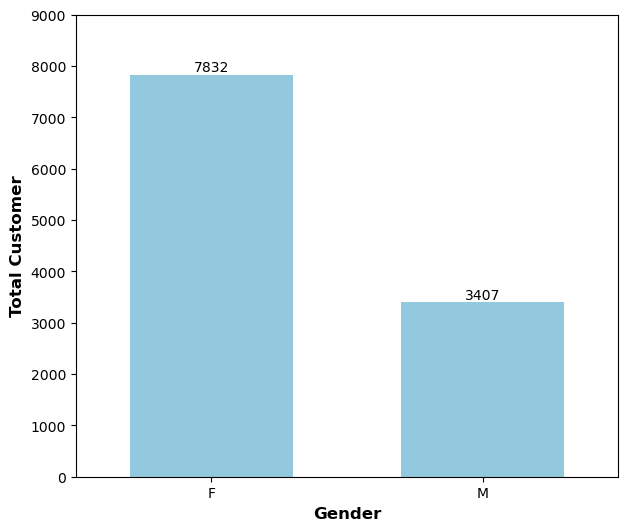

In [231]:
plt.figure(figsize=(7,6))
ax=sns.countplot(x='Gender',width=0.6,color='skyblue',data=df)

for i in ax.containers:
    ax.bar_label(i)
    
plt.xlabel('Gender',fontsize=12, fontweight= 'bold')
plt.ylabel('Total Customer', fontsize=12, fontweight= 'bold')
plt.ylim(0,9000)
plt.show()

### Which Gender Spend most Money ?

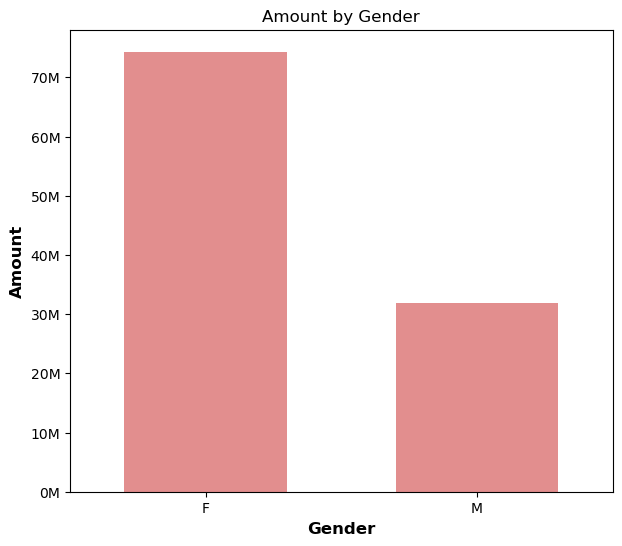

In [238]:
plt.figure(figsize=(7,6))
x= sns.barplot(x='Gender',y='Amount',width=0.6,color='lightcoral',estimator='sum',errorbar=None, data=df)

converter = ticker.FuncFormatter(millions_converter)
plt.gca().yaxis.set_major_formatter(converter)

plt.title("Amount by Gender")
plt.xlabel('Gender',fontsize=12, fontweight= 'bold')
plt.ylabel('Amount',fontsize=12, fontweight= 'bold')
plt.show()

### Gender that Orders Most

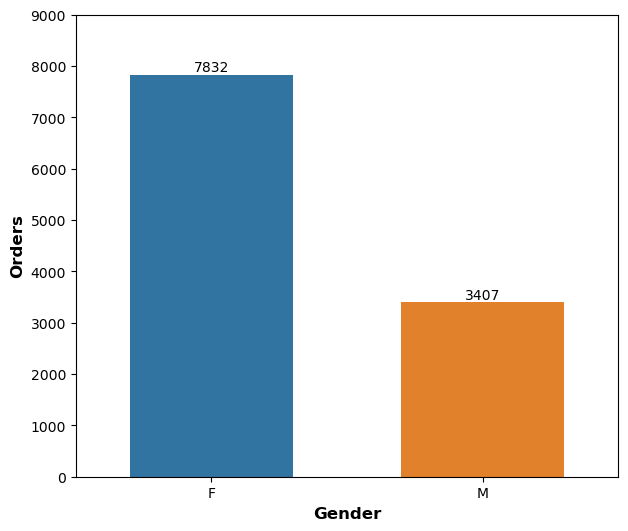

In [223]:
plt.figure(figsize=(7,6))
ax=sns.barplot(x='Gender',y='Orders',width=0.6,errorbar=None,estimator='count', data=df)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel("Gender", fontsize=12, fontweight= 'bold')
plt.ylabel("Orders", fontsize=12, fontweight= 'bold')
plt.ylim(0,9000)
plt.show()

# Age_Group Analysis

### AgeGroup  that Spend Most ?

In [23]:
#Amount Spend By Age Group
amt_spend_by_age_group= df.groupby(['Age_Group', 'Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount')
amt_spend_by_age_group.head()

,Age_Group,Gender,Amount
1,0-17,M,1258244
0,0-17,F,1441409
13,55+,M,1676056
12,55+,F,2404931
9,46-50,M,2464451


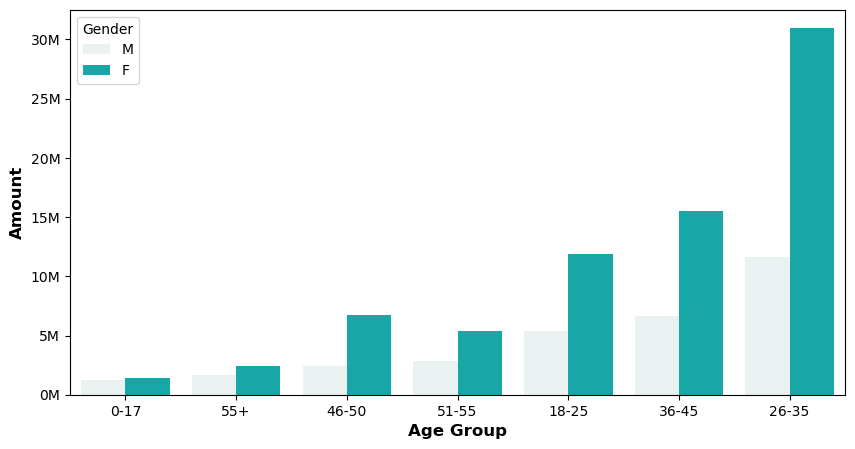

In [239]:
plt.figure(figsize=(10,5))
sns.barplot(x='Age_Group', y='Amount',hue='Gender',color='c', data=amt_spend_by_age_group)

converter = ticker.FuncFormatter(millions_converter)
plt.gca().yaxis.set_major_formatter(converter)

plt.xlabel("Age Group", fontsize=12, fontweight= 'bold')
plt.ylabel("Amount",fontsize=12, fontweight= 'bold')
plt.show()

## Women % Share in Grand Total

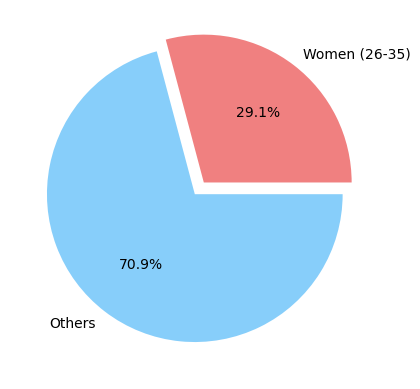

In [192]:
# Pre-process (Total Amount, Spend by Women 26-35)
total_amount =amt_spend_by_age_group['Amount'].sum() 
spend_by_26_35_women = amt_spend_by_age_group[(amt_spend_by_age_group['Age_Group']=='26-35') & (amt_spend_by_age_group['Gender']=='F')]  ['Amount'].sum()

# Calculate percentage
women_26_35_share = (spend_by_26_35_women / total_amount) * 100
other_percentage = 100 - percentage_women_26_35


# Create the pie chart
sizes = [women_26_35_share, other_percentage]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Explode the first slice (Women) for emphasis

plt.pie(sizes, explode=explode, labels=['Women (26-35)','Others'], colors=colors, autopct='%1.1f%%')
plt.show()


 Insight: Women of Age Group 26-35 contribute 29.14% in total sale

### AgeGroup with most Orders

In [103]:
#Order Count Spend By Age Group
order_by_age_group= df.groupby(['Age_Group', 'Gender'], as_index= False)['Orders'].sum().sort_values(by='Orders')
order_by_age_group.head()

,Age_Group,Gender,Orders
1,0-17,M,313
0,0-17,F,377
13,55+,M,379
9,46-50,M,694
11,51-55,M,695


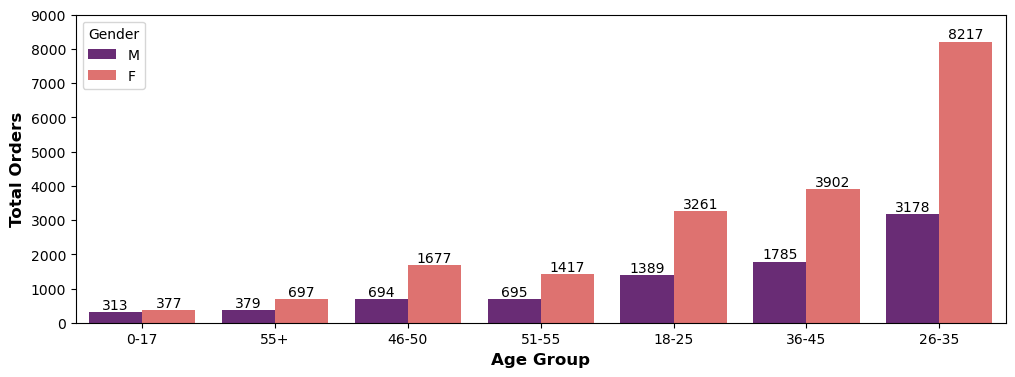

In [241]:
plt.figure(figsize=(12,4))

ax=sns.barplot(x='Age_Group', y='Orders',hue='Gender', palette='magma',data=order_by_age_group)

for i in ax.containers:
    ax.bar_label(i)
    
plt.xlabel("Age Group", fontsize=12, fontweight='bold')
plt.ylabel("Total Orders", fontsize=12, fontweight='bold')
plt.ylim(0,9000)
plt.show()

# State-Wise Analysis

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### Orders by State -- Ascending=False(Imp) bcoz we need top 10 state, not random

In [79]:
#Aggregating Data
order_by_state= df.groupby(['State', 'Gender'], as_index= False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(15)
order_by_state.head(3)

,State,Gender,Orders
28,Uttar Pradesh,F,3396
20,Maharashtra,F,2813
14,Karnataka,F,2265


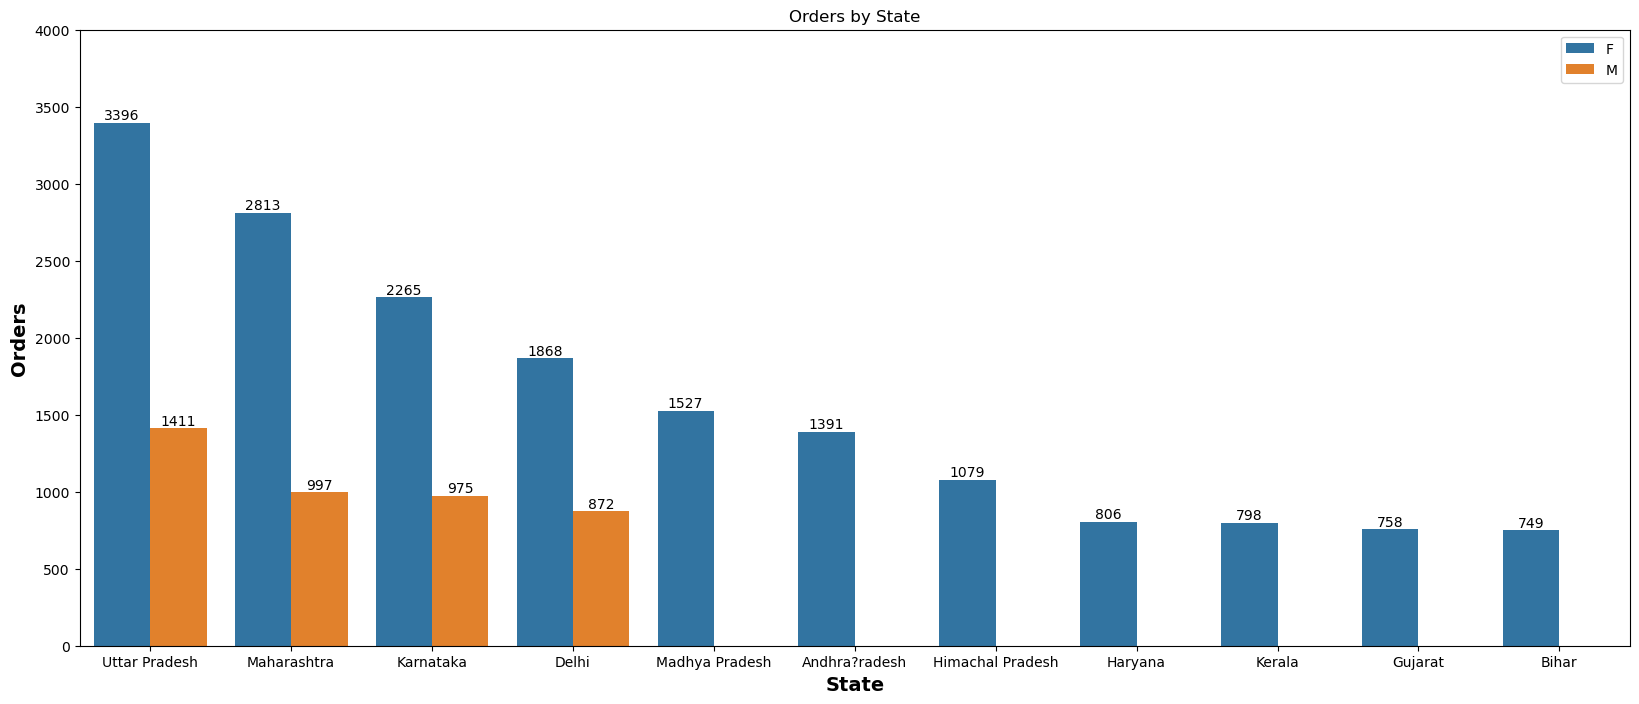

In [195]:
#Plot
plt.figure(figsize=(20,8))
x=sns.barplot(x='State', y='Orders', hue='Gender', data=order_by_state) 

for i in x.containers:
    x.bar_label(i)
    
plt.title("Orders by State")  
plt.xlabel('State',fontsize=14, fontweight='bold')
plt.ylabel('Orders',fontsize=14, fontweight='bold')
plt.ylim(0,4000)
plt.legend(loc=1)
plt.show()

### Total Amount By State-- Ascending= False 

In [31]:
#Aggregating Data
sales_by_state= df.groupby(['State', 'Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sales_by_state.head(3)

,State,Gender,Amount
28,Uttar Pradesh,F,13662105
20,Maharashtra,F,10560976
14,Karnataka,F,9933966


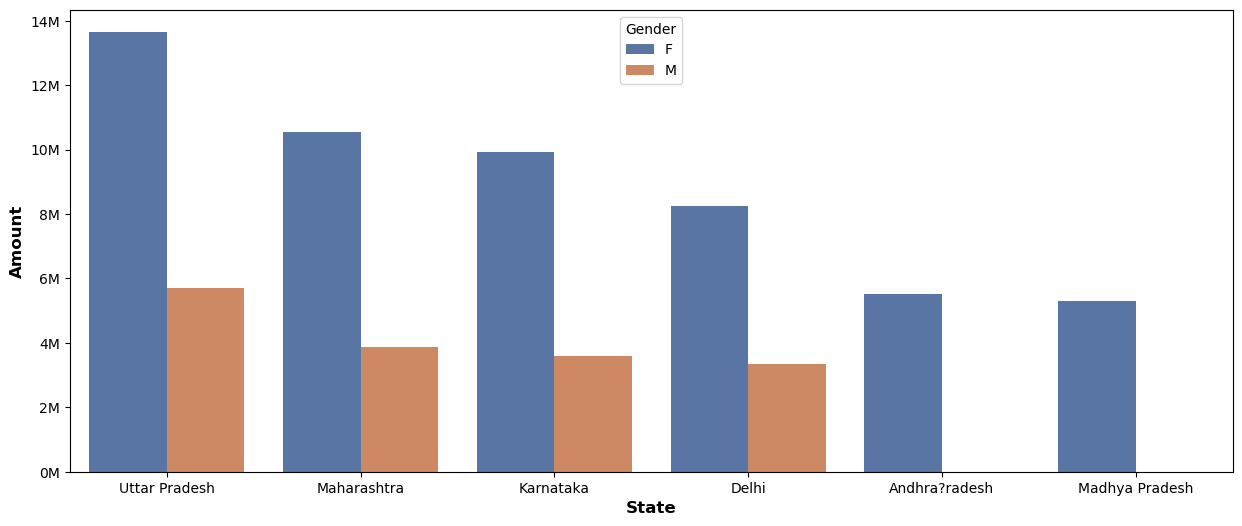

In [242]:
#Plot
plt.figure(figsize=(15,6))
x=sns.barplot(x='State', y='Amount', hue='Gender',palette='deep', data= sales_by_state)

converter = ticker.FuncFormatter(millions_converter)
plt.gca().yaxis.set_major_formatter(converter)

plt.xlabel('State',fontsize=12, fontweight='bold')
plt.ylabel('Amount',fontsize=12, fontweight='bold')
plt.show()

# Marital Status

In [33]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [34]:
orders_by_marital_status= df.groupby(['Marital_Status'], as_index= False)['Orders'].sum().sort_values(by='Orders', ascending=False)
orders_by_marital_status.head(3)

,Marital_Status,Orders
0,0,16249
1,1,11732


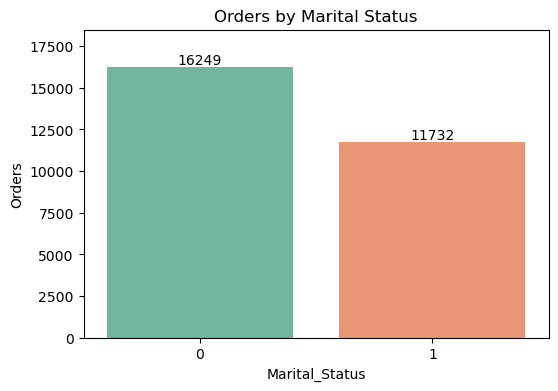

In [52]:
plt.figure(figsize=(6,4))
x=sns.barplot(x='Marital_Status', y='Orders',palette='Set2', data= orders_by_marital_status)

for i in x.containers:
    x.bar_label(i)
plt.title("Orders by Marital Status")
plt.ylim(0,18500)
plt.show()

In [36]:
amount_by_marital_status= df.groupby(['Marital_Status'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False)
amount_by_marital_status.head(3)

,Marital_Status,Amount
0,0,62125384
1,1,44123745


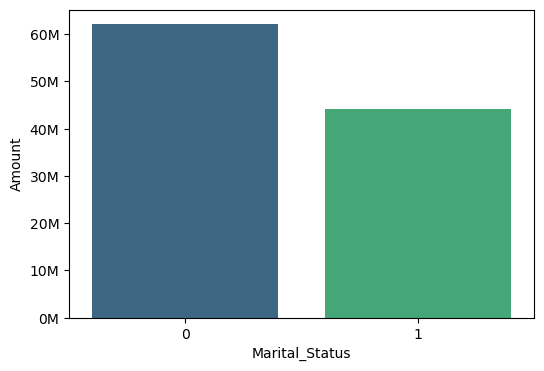

In [243]:
plt.figure(figsize=(6,4))
x=sns.barplot(x='Marital_Status', y='Amount',palette='viridis', data= amount_by_marital_status)

converter = ticker.FuncFormatter(millions_converter)
plt.gca().yaxis.set_major_formatter(converter)

plt.show()

# Occupation

In [38]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [56]:
orders_by_occupation=df.groupby(['Occupation','Gender'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
orders_by_occupation=orders_by_occupation.reset_index(drop=True)

### Orders by Customer Occupation

In [58]:
Amount_by_occupation= df.groupby(['Occupation', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
Amount_by_occupation= Amount_by_occupation.reset_index(drop=True)
Amount_by_occupation.head(5)

,Occupation,Gender,Amount
0,IT Sector,F,10184835
1,Aviation,F,9007393
2,Healthcare,F,8968231
3,Banking,F,7792295
4,Govt,F,6002907


### Amount by Customer Occupation

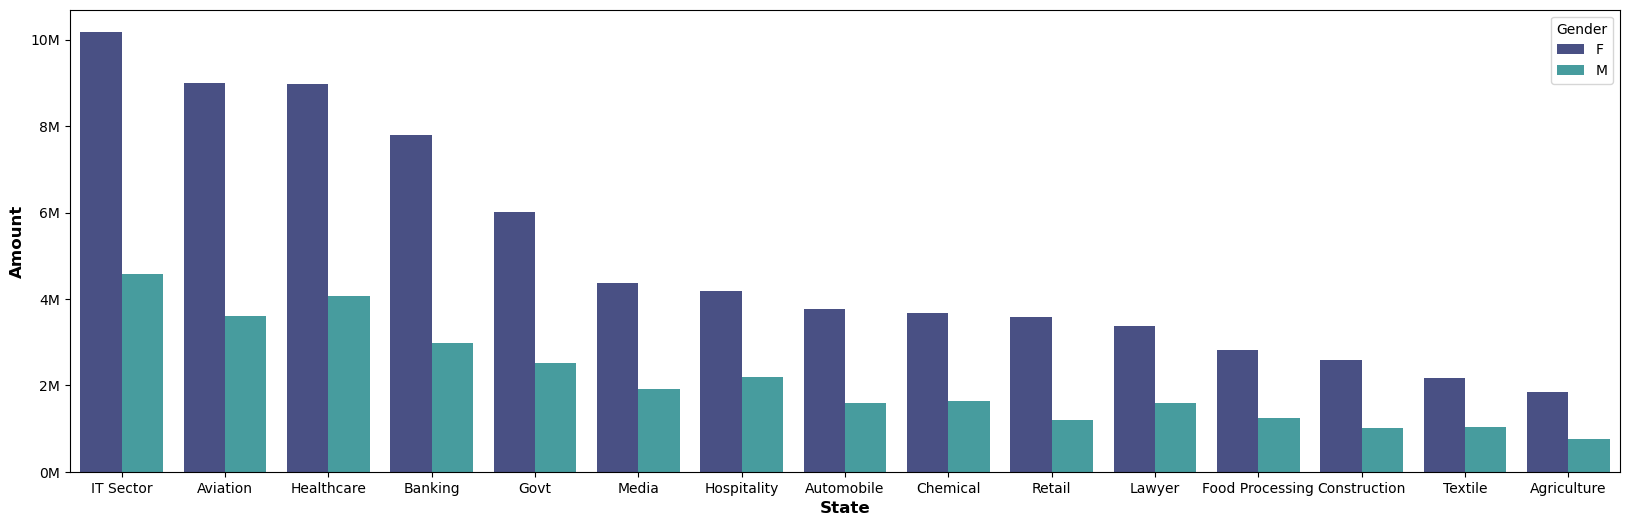

In [246]:
plt.figure(figsize=(20,6))
sns.barplot(x='Occupation', y='Amount',hue='Gender',errorbar=None, palette='mako',data= Amount_by_occupation)

converter = ticker.FuncFormatter(millions_converter)
plt.gca().yaxis.set_major_formatter(converter)

plt.xlabel('State',fontsize=12, fontweight='bold')
plt.ylabel('Amount',fontsize=12, fontweight='bold')
plt.show()

# Product_Category Analysis

In [60]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [61]:
orders_by_cat= df.groupby(['Product_Category','State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
orders_by_cat=orders_by_cat.reset_index(drop=True)
orders_by_cat.head(5)

,Product_Category,State,Orders
0,Food,Uttar Pradesh,1406
1,Food,Maharashtra,1191
2,Clothing & Apparel,Uttar Pradesh,1186
3,Footwear & Shoes,Karnataka,841
4,Clothing & Apparel,Maharashtra,827


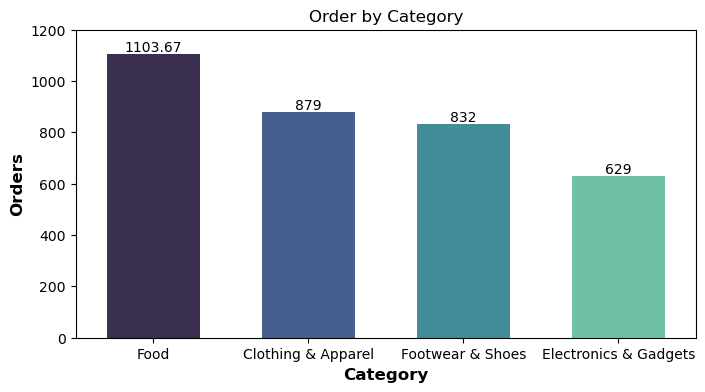

In [201]:
plt.figure(figsize=(8,4))
x=sns.barplot(x='Product_Category', y='Orders',width=0.6,errorbar=None, palette='mako', data= orders_by_cat)
for i in x.containers:
    x.bar_label(i)
plt.title("Order by Category")
plt.xlabel('Category',fontsize=12, fontweight='bold')
plt.ylabel('Orders',fontsize=12, fontweight='bold')
plt.ylim(0,1200)
plt.show()

In [63]:
amt_by_cat= df.groupby(['Product_Category','State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
amt_by_cat=amt_by_cat.reset_index(drop=True)
amt_by_cat.head(5)

,Product_Category,State,Amount
0,Food,Uttar Pradesh,7983142
1,Food,Maharashtra,6421531
2,Footwear & Shoes,Delhi,5027449
3,Footwear & Shoes,Karnataka,4963928
4,Food,Karnataka,3995458


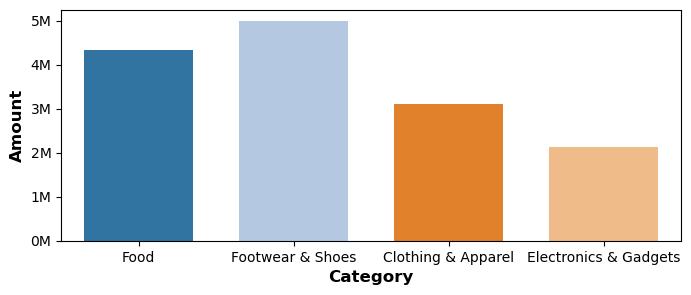

In [250]:
plt.figure(figsize=(8,3))

x=sns.barplot(x='Product_Category', y='Amount',width=0.7,errorbar=None, palette='tab20', data= amt_by_cat)

converter = ticker.FuncFormatter(millions_converter)
plt.gca().yaxis.set_major_formatter(converter)

plt.xlabel('Category',fontsize=12, fontweight='bold')
plt.ylabel('Amount',fontsize=12, fontweight='bold')
plt.show()

# Summary for the Analysis